In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [22]:
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.tree import plot_tree, DecisionTreeClassifier as CART
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [23]:
df = pd.read_csv(
    'IPA.csv',
    sep=',',
    header=0)

In [24]:
df.head()

,IsIPA,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency,UserId
0,False,1.069,1.007,8.12,0.00,30.48,60,NaN,NaN,75.0,NaN
1,False,1.064,1.012,6.80,9.36,9.85,60,1.132,0.50,35.0,NaN
2,False,1.061,1.015,6.08,28.31,35.83,60,1.044,0.35,83.0,42087.0
3,False,1.053,1.012,5.44,46.48,5.77,60,1.033,NaN,70.0,NaN
4,False,1.053,1.017,4.64,42.29,4.22,90,1.039,0.50,77.0,14729.0


In [25]:
counts = df['IsIPA'].value_counts()
counts

False    25199
True     11801
Name: IsIPA, dtype: int64

In [26]:
IsIPA_datatype = df['IsIPA'].dtype
IsIPA_datatype

dtype('bool')

In [27]:
df['IsIPA'] = df['IsIPA'].astype(int)

In [28]:
df

,IsIPA,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency,UserId
0,0,1.069,1.007,8.12,0.00,30.48,60,NaN,NaN,75.0,NaN
1,0,1.064,1.012,6.80,9.36,9.85,60,1.132,0.50,35.0,NaN
2,0,1.061,1.015,6.08,28.31,35.83,60,1.044,0.35,83.0,42087.0
3,0,1.053,1.012,5.44,46.48,5.77,60,1.033,NaN,70.0,NaN
4,0,1.053,1.017,4.64,42.29,4.22,90,1.039,0.50,77.0,14729.0
...,...,...,...,...,...,...,...,...,...,...,...
36995,0,1.069,1.012,7.39,71.03,3.95,75,1.051,NaN,70.0,NaN
36996,0,1.063,1.016,6.22,0.00,7.41,60,1.058,NaN,70.0,NaN
36997,1,1.056,1.015,5.50,38.05,20.59,60,1.089,0.75,70.0,NaN
36998,1,1.068,1.019,6.40,65.08,9.90,60,1.050,NaN,70.0,65316.0


In [29]:
df.isna().sum()

IsIPA              0
OG                 0
FG                 0
ABV                0
IBU                0
Color              0
BoilTime           0
BoilGravity     1328
PitchRate      19645
Efficiency         0
UserId         25448
dtype: int64

In [30]:
df = df.fillna(df.mean())

In [31]:
df.shape[0]

37000

In [32]:
df.drop("UserId", axis=1, inplace=True)

In [33]:
df

,IsIPA,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency
0,0,1.069,1.007,8.12,0.00,30.48,60,1.053834,0.73478,75.0
1,0,1.064,1.012,6.80,9.36,9.85,60,1.132000,0.50000,35.0
2,0,1.061,1.015,6.08,28.31,35.83,60,1.044000,0.35000,83.0
3,0,1.053,1.012,5.44,46.48,5.77,60,1.033000,0.73478,70.0
4,0,1.053,1.017,4.64,42.29,4.22,90,1.039000,0.50000,77.0
...,...,...,...,...,...,...,...,...,...,...
36995,0,1.069,1.012,7.39,71.03,3.95,75,1.051000,0.73478,70.0
36996,0,1.063,1.016,6.22,0.00,7.41,60,1.058000,0.73478,70.0
36997,1,1.056,1.015,5.50,38.05,20.59,60,1.089000,0.75000,70.0
36998,1,1.068,1.019,6.40,65.08,9.90,60,1.050000,0.73478,70.0


In [34]:
X = df.drop(columns='IsIPA')
y = df.IsIPA
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.6,
                                                    random_state=42)

In [35]:
def f1_scorer(model, X, y):
    return f1_score(y, model.predict(X))

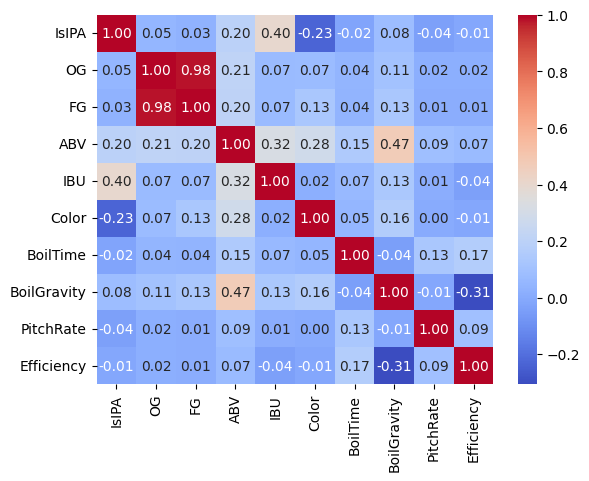

In [36]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [37]:
numeric_df = df.select_dtypes(np.number)
numeric_df

,IsIPA,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency
0,0,1.069,1.007,8.12,0.00,30.48,60,1.053834,0.73478,75.0
1,0,1.064,1.012,6.80,9.36,9.85,60,1.132000,0.50000,35.0
2,0,1.061,1.015,6.08,28.31,35.83,60,1.044000,0.35000,83.0
3,0,1.053,1.012,5.44,46.48,5.77,60,1.033000,0.73478,70.0
4,0,1.053,1.017,4.64,42.29,4.22,90,1.039000,0.50000,77.0
...,...,...,...,...,...,...,...,...,...,...
36995,0,1.069,1.012,7.39,71.03,3.95,75,1.051000,0.73478,70.0
36996,0,1.063,1.016,6.22,0.00,7.41,60,1.058000,0.73478,70.0
36997,1,1.056,1.015,5.50,38.05,20.59,60,1.089000,0.75000,70.0
36998,1,1.068,1.019,6.40,65.08,9.90,60,1.050000,0.73478,70.0


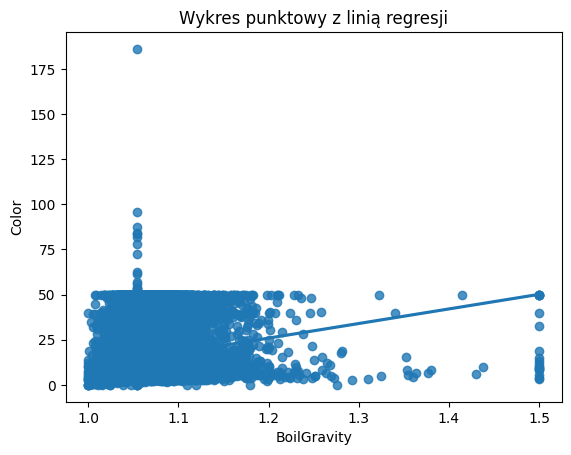

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wykres punktowy z linią regresji
sns.regplot(x='BoilGravity', y='Color', data=df, ci=None)
plt.title('Wykres punktowy z linią regresji')
plt.show()

In [39]:
#Tuning number of trees and number of features
grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': np.linspace(1, X_train.shape[1], 5).astype(int)
}
tuning_res_rf = GridSearchCV(RFC(random_state=42),
                             param_grid=grid,
                             scoring='accuracy',
                             n_jobs=1,
                             cv=3,
                             verbose=2)
tuning_res_rf.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END ....................max_features=1, n_estimators=50; total time=   0.8s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.7s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.7s
[CV] END ...................max_features=1, n_estimators=100; total time=   1.6s
[CV] END ...................max_features=1, n_estimators=100; total time=   1.6s
[CV] END ...................max_features=1, n_estimators=100; total time=   1.5s
[CV] END ...................max_features=1, n_estimators=200; total time=   3.2s
[CV] END ...................max_features=1, n_estimators=200; total time=   3.2s
[CV] END ...................max_features=1, n_estimators=200; total time=   3.4s
[CV] END ...................max_features=1, n_estimators=300; total time=   4.7s
[CV] END ...................max_features=1, n_estimators=300; total time=   4.7s
[CV] END ...................max_features=1, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_features': array([1, 3, 5, 7, 9]),
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='accuracy', verbose=2)

In [40]:
n_trees = grid['n_estimators']
max_features = grid['max_features']
arr = tuning_res_rf.cv_results_['mean_test_score'].reshape(
    len(max_features), len(n_trees))
df = pd.DataFrame(arr, columns=n_trees, index=max_features)

Text(50.722222222222214, 0.5, '# features')

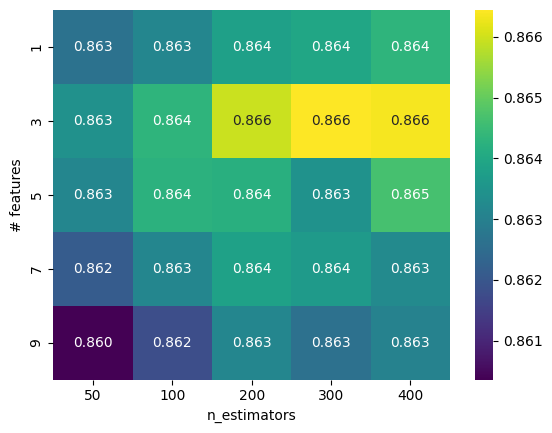

In [41]:
p = sns.heatmap(df, annot=True, fmt='.3f', cmap='viridis')
p.set_xlabel("n_estimators")
p.set_ylabel("# features")

In [42]:
print(tuning_res_rf.best_params_)
Best_RF = tuning_res_rf.best_estimator_

{'max_features': 3, 'n_estimators': 300}


Text(0, 0.5, 'Impurity reduction')

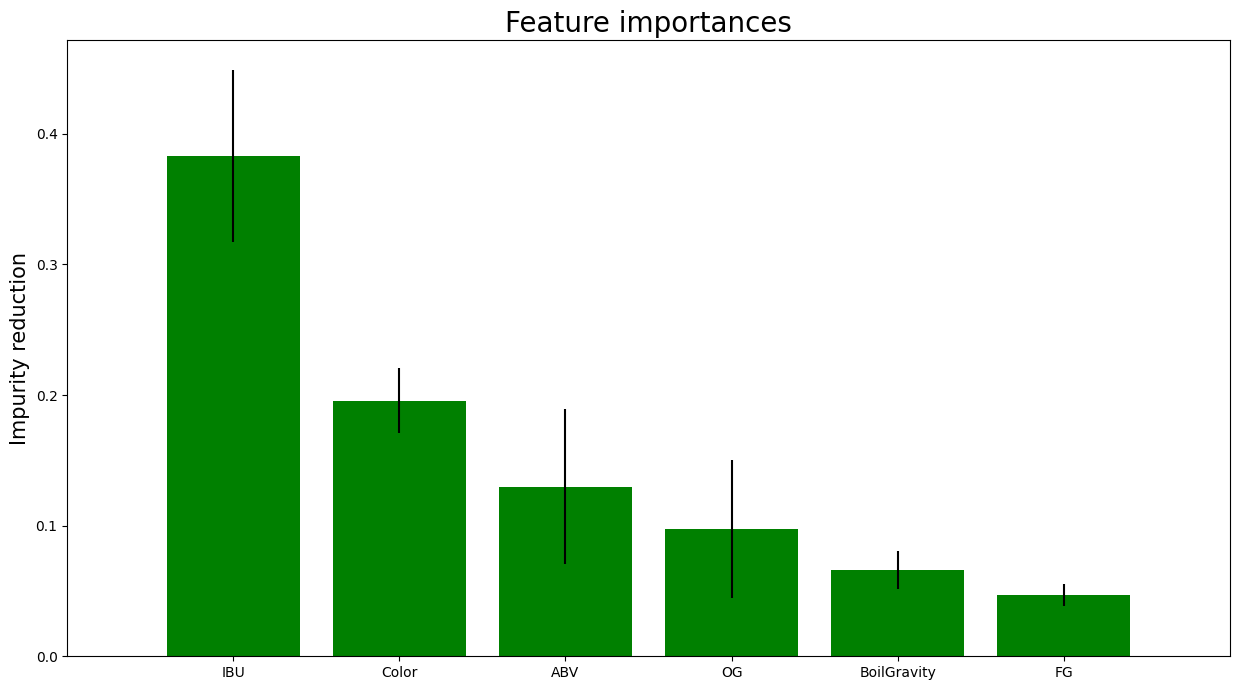

In [43]:
# Plot the feature importances of the forest
importances = Best_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in Best_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

num_feat = 6
plt.figure(figsize=[15, 8])
plt.title("Feature importances", fontsize=20)
plt.bar(range(num_feat)[:num_feat],
        importances[indices][:num_feat],
        color="g",
        yerr=std[indices][:num_feat],
        align="center")
plt.xticks(range(num_feat)[:num_feat], X_train.columns[indices[:num_feat]])
plt.xlim([-1, num_feat])
plt.ylabel("Impurity reduction", fontsize=15)

In [44]:
f1_scorer(Best_RF, X_test, y_test)

0.775985072988695

In [45]:
dist = {'n_estimators': stats.randint(100, 400), 'subsample': stats.uniform()}
tuning_res_gbc = RandomizedSearchCV(GBC(random_state=42),
                                    param_distributions=dist,
                                    scoring='accuracy',
                                    n_iter=25,
                                    n_jobs=1,
                                    cv=3,
                                    verbose=2)
tuning_res_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END ....n_estimators=244, subsample=0.24679339446473036; total time=   2.4s
[CV] END ....n_estimators=244, subsample=0.24679339446473036; total time=   2.3s
[CV] END ....n_estimators=244, subsample=0.24679339446473036; total time=   2.2s
[CV] END ....n_estimators=140, subsample=0.05176221852484364; total time=   0.6s
[CV] END ....n_estimators=140, subsample=0.05176221852484364; total time=   0.6s
[CV] END ....n_estimators=140, subsample=0.05176221852484364; total time=   0.6s
[CV] END .....n_estimators=160, subsample=0.7715250861159648; total time=   2.9s
[CV] END .....n_estimators=160, subsample=0.7715250861159648; total time=   2.9s
[CV] END .....n_estimators=160, subsample=0.7715250861159648; total time=   3.0s
[CV] END .....n_estimators=300, subsample=0.6463056000859524; total time=   5.0s
[CV] END .....n_estimators=300, subsample=0.6463056000859524; total time=   5.6s
[CV] END .....n_estimators=300, subsample=0.6463

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=25, n_jobs=1,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E4BB7779A0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E4BB718130>},
                   scoring='accuracy', verbose=2)

In [46]:
print(tuning_res_gbc.best_params_)
Best_GBT = tuning_res_gbc.best_estimator_

{'n_estimators': 216, 'subsample': 0.9260196606482483}


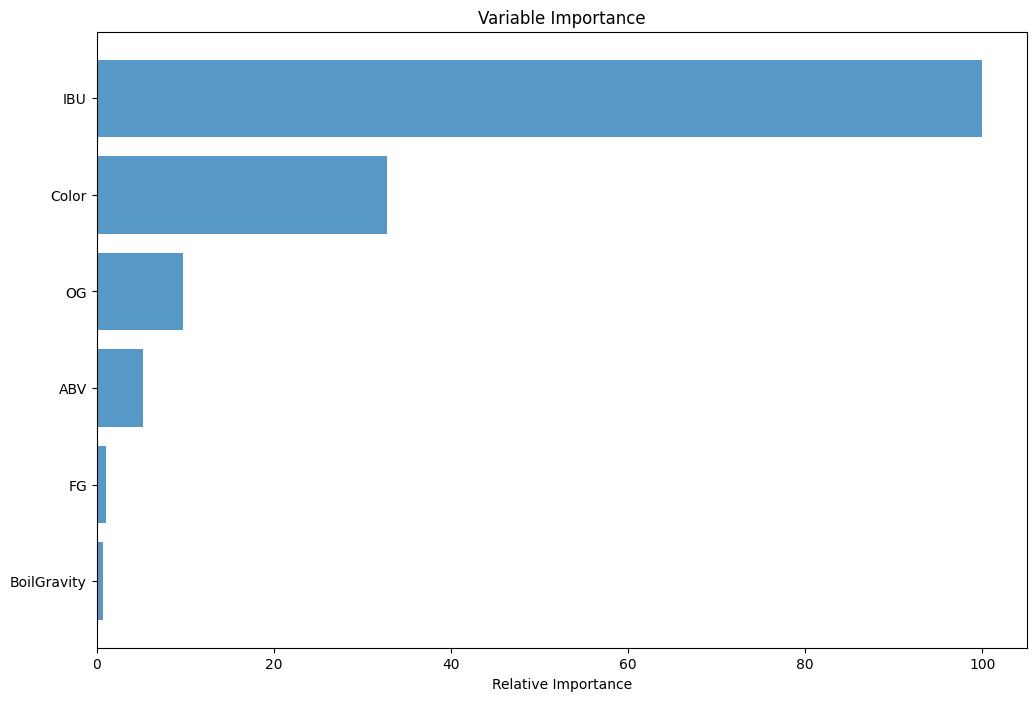

In [47]:
# Plot feature importance
feature_importance = Best_GBT.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 6

plt.figure(figsize=[12, 8])
plt.barh(pos[-num_feat:],
         feature_importance[sorted_idx][-num_feat:],
         align='center',
         alpha=0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

In [49]:
f1_scorer(Best_GBT, X_test, y_test)

0.7760541839632947

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
lr = LogisticRegression

In [55]:
model2 = lr(penalty=None, max_iter=1000, n_jobs=-1).fit(X_train, y_train)

In [61]:
f1_scorer(model2, X_test, y_test)

0.6973365617433414

In [67]:
from lightgbm import LGBMClassifier

In [72]:
model_pipeline = make_pipeline(
    LGBMClassifier(random_state=42)
)

# Trenowanie modelu
model_pipeline.fit(X_train, y_train)

# Predykcja na zbiorze walidacyjnym
y_test_pred = model_pipeline.predict(X_test)

# Wartość F1 na zbiorze walidacyjnym
f1_test = f1_score(y_test, y_test_pred)
print("F1 Score on Validation Set:", f1_test)

[LightGBM] [Info] Number of positive: 7108, number of negative: 15092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 22200, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320180 -> initscore=-0.752944
[LightGBM] [Info] Start training from score -0.752944
F1 Score on Validation Set: 0.7777295420013023


In [48]:
models = [Best_RF, Best_GBT]
accuracies_test = [acc(m, X_test, y_test) for m in models] # bierzemy tu zbior testowy z początku

NameError: name 'acc' is not defined

In [ ]:
plt.bar(['CART', 'Random Forest', 'Gradient Boosted Trees'],
        accuracies_test,
        color=['red', 'green', 'blue'],
        alpha=0.75)
plt.ylabel('Accuracy');

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
# Podział danych na zbiór treningowy i walidacyjny
X_train, X_val, y_train, y_val = train_test_split(
    train_data.drop(['IsIPA'], axis=1),
    train_data['IsIPA'],
    test_size=0.2,
    random_state=42
)

NameError: name 'train_df' is not defined

In [ ]:
# Pipeline do obsługi brakujących danych, skalowania, i klasyfikacji
model_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

In [ ]:
# Hiperparametry do optymalizacji
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Optymalizacja hiperparametrów
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Wydrukowanie najlepszych parametrów
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Predykcja na zbiorze walidacyjnym
y_val_pred = grid_search.predict(X_val)

In [ ]:
# Wartość F1 na zbiorze walidacyjnym
f1_val = f1_score(y_val, y_val_pred)
print("F1 Score on Validation Set:", f1_val)


In [ ]:
# Predykcja na zbiorze testowym
test_predictions = grid_search.predict(test_data.drop(['UserId'], axis=1))


In [ ]:
# Zapisanie predykcji do pliku CSV
test_data['IsIPA'] = test_predictions
test_data[['UserId', 'IsIPA']].to_csv('IPA_predictions.csv', index=False)